In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import os
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Paths
data_dir = '/home/vamsi/cv/project/grayclass/dg64'
batch_size = 32
num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Data transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split into train and test sets (e.g., 80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Print number of images in each set
print(f'Number of images in training set: {len(train_dataset)}')
print(f'Number of images in testing set: {len(test_dataset)}')

# Optional: Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Initialize the model
num_classes = len(os.listdir(data_dir))  # Number of classes
model = SimpleCNN(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




Number of images in training set: 14188
Number of images in testing set: 3548


In [12]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%')

print('Training complete.')

Epoch [1/50], Loss: 2.0393, Accuracy: 22.47%
Epoch [2/50], Loss: 1.6967, Accuracy: 37.88%
Epoch [3/50], Loss: 1.4769, Accuracy: 47.46%
Epoch [4/50], Loss: 1.3425, Accuracy: 52.16%
Epoch [5/50], Loss: 1.2593, Accuracy: 54.80%
Epoch [6/50], Loss: 1.1962, Accuracy: 57.41%
Epoch [7/50], Loss: 1.1443, Accuracy: 59.32%
Epoch [8/50], Loss: 1.0880, Accuracy: 62.00%
Epoch [9/50], Loss: 1.0375, Accuracy: 63.78%
Epoch [10/50], Loss: 0.9881, Accuracy: 65.65%
Epoch [11/50], Loss: 0.9474, Accuracy: 66.83%
Epoch [12/50], Loss: 0.8940, Accuracy: 68.85%
Epoch [13/50], Loss: 0.8414, Accuracy: 70.76%
Epoch [14/50], Loss: 0.7980, Accuracy: 72.18%
Epoch [15/50], Loss: 0.7460, Accuracy: 74.07%
Epoch [16/50], Loss: 0.6902, Accuracy: 76.24%
Epoch [17/50], Loss: 0.6608, Accuracy: 77.28%
Epoch [18/50], Loss: 0.6084, Accuracy: 79.62%
Epoch [19/50], Loss: 0.5628, Accuracy: 80.48%
Epoch [20/50], Loss: 0.5224, Accuracy: 82.25%
Epoch [21/50], Loss: 0.4823, Accuracy: 83.53%
Epoch [22/50], Loss: 0.4424, Accuracy: 84.9

In [2]:
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_accuracy = 100 * correct / total
    train_loss = running_loss / len(train_loader)
    
    # Testing phase
    model.eval()
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()
    
    test_accuracy = 100 * test_correct / test_total
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Accuracy: {test_accuracy:.2f}%')

print('Training complete.')


Epoch [1/50], Train Loss: 1.8686, Train Accuracy: 30.67%, Test Accuracy: 42.00%
Epoch [2/50], Train Loss: 1.4206, Train Accuracy: 48.37%, Test Accuracy: 47.89%
Epoch [3/50], Train Loss: 1.2546, Train Accuracy: 55.55%, Test Accuracy: 52.28%
Epoch [4/50], Train Loss: 1.1468, Train Accuracy: 59.30%, Test Accuracy: 52.20%
Epoch [5/50], Train Loss: 1.0594, Train Accuracy: 62.88%, Test Accuracy: 57.05%
Epoch [6/50], Train Loss: 0.9757, Train Accuracy: 65.94%, Test Accuracy: 57.58%
Epoch [7/50], Train Loss: 0.8835, Train Accuracy: 69.24%, Test Accuracy: 56.79%
Epoch [8/50], Train Loss: 0.8146, Train Accuracy: 71.19%, Test Accuracy: 57.16%
Epoch [9/50], Train Loss: 0.7448, Train Accuracy: 74.08%, Test Accuracy: 54.76%
Epoch [10/50], Train Loss: 0.6813, Train Accuracy: 76.28%, Test Accuracy: 57.22%
Epoch [11/50], Train Loss: 0.6087, Train Accuracy: 78.73%, Test Accuracy: 57.10%
Epoch [12/50], Train Loss: 0.5514, Train Accuracy: 80.58%, Test Accuracy: 55.47%
Epoch [13/50], Train Loss: 0.4860, Tr

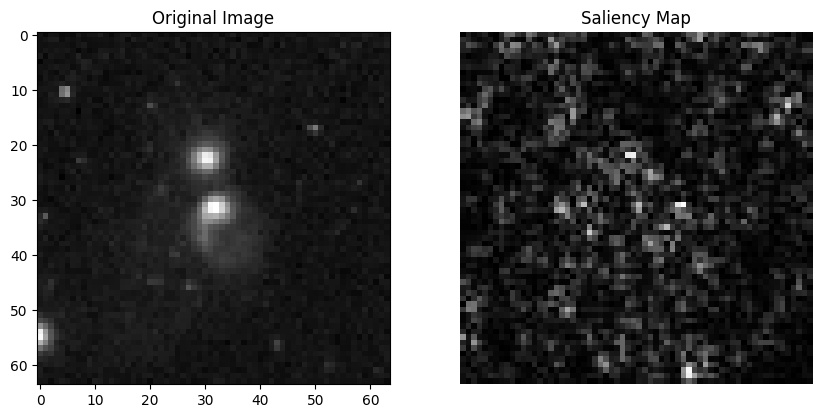

In [27]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Ensure to load your model first and move it to the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example: Load a pre-trained model (e.g., ResNet)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Adjust for 1-channel input
model.to(device)  # Move the model to the same device as input
model.eval()  # Set model to evaluation mode

# Load and preprocess the input image
image_path = '/home/vamsi/cv/project/grayclass/dg64/0/image_1.png'
image = Image.open(image_path).convert('L')  # Ensure grayscale (L mode)

# Transform to match model input requirements
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize for your model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Adjust for grayscale images
])

input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to the same device

# Enable gradient computation for input
input_image.requires_grad_()

# Forward pass
output = model(input_image)
output_class = output.argmax(dim=1).item()  # Predicted class

# Backward pass to get gradients of the predicted class w.r.t. input
model.zero_grad()
output[0, output_class].backward()

# Get saliency map (absolute value of gradients)
saliency_map = input_image.grad.data.abs().squeeze()

# Ensure saliency map is 2D and has the correct shape
saliency_map = saliency_map.cpu().numpy()

# Plot the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='gray')  # Now it can display as 2D
plt.title('Saliency Map')
plt.axis('off')

plt.show()


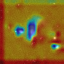

In [106]:

import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


# Initialize the model
num_classes = 10  # Adjust based on your number of classes
model = SimpleCNN(num_classes=num_classes)

# Load your image (grayscale)
img_path = '/home/vamsi/cv/project/grayclass/dg64/0/image_0.png'  # Replace with your image path
img = Image.open(img_path).convert('L')  # 'L' mode for grayscale

# Preprocessing: resize and convert to tensor
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize image to 64x64
    transforms.ToTensor(),  # Convert to tensor
])

input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

# Convert input tensor to numpy array for visualization
rgb_img = np.array(img.convert('RGB')) / 255.0  # Normalize to [0, 1] range

# Load your SimpleCNN model
model.eval()

# Define the target layer for CAM (the last convolutional layer)
target_layers = [model.conv_layers[-1]]  # Target the last convolutional layer

# Define the target for CAM (you can choose the correct class index)
targets = [ClassifierOutputTarget(0)]  # Use the class index for your target class

# Create the GradCAM object and compute the CAM
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]  # Use the first image in the batch
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Now `visualization` contains the image with the CAM overlay, you can display it
Image.fromarray(visualization).show()

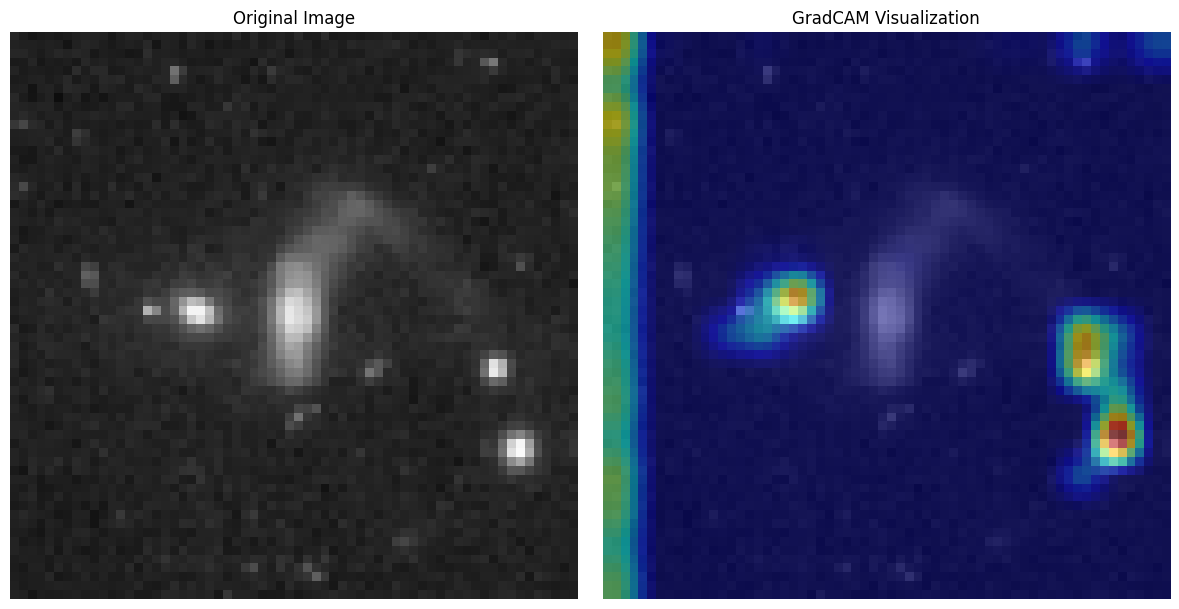

In [113]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# Initialize the model
num_classes = 10  # Adjust based on your number of classes
model = SimpleCNN(num_classes=num_classes)

# Load your image (grayscale)
img_path = '/home/vamsi/cv/project/grayclass/dg64/0/image_0.png'  # Replace with your image path
img = Image.open(img_path).convert('L')  # 'L' mode for grayscale

# Preprocessing: resize and convert to tensor
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize image to 64x64
    transforms.ToTensor(),  # Convert to tensor
])

input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

# Convert input tensor to numpy array for visualization
rgb_img = np.array(img.convert('RGB')) / 255.0  # Normalize to [0, 1] range

# Load your SimpleCNN model
model.eval()

# Define the target layer for CAM (the last convolutional layer)
target_layers = [model.conv_layers[-1]]  # Target the last convolutional layer

# Define the target for CAM (you can choose the correct class index)
targets = [ClassifierOutputTarget(0)]  # Use the class index for your target class

# Create the GradCAM object and compute the CAM
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]  # Use the first image in the batch
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Now `visualization` contains the image with the CAM overlay, you can display it using matplotlib
# Display input and output images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
ax[0].imshow(rgb_img)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Display CAM overlay image
ax[1].imshow(visualization)
ax[1].set_title("GradCAM Visualization")
ax[1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


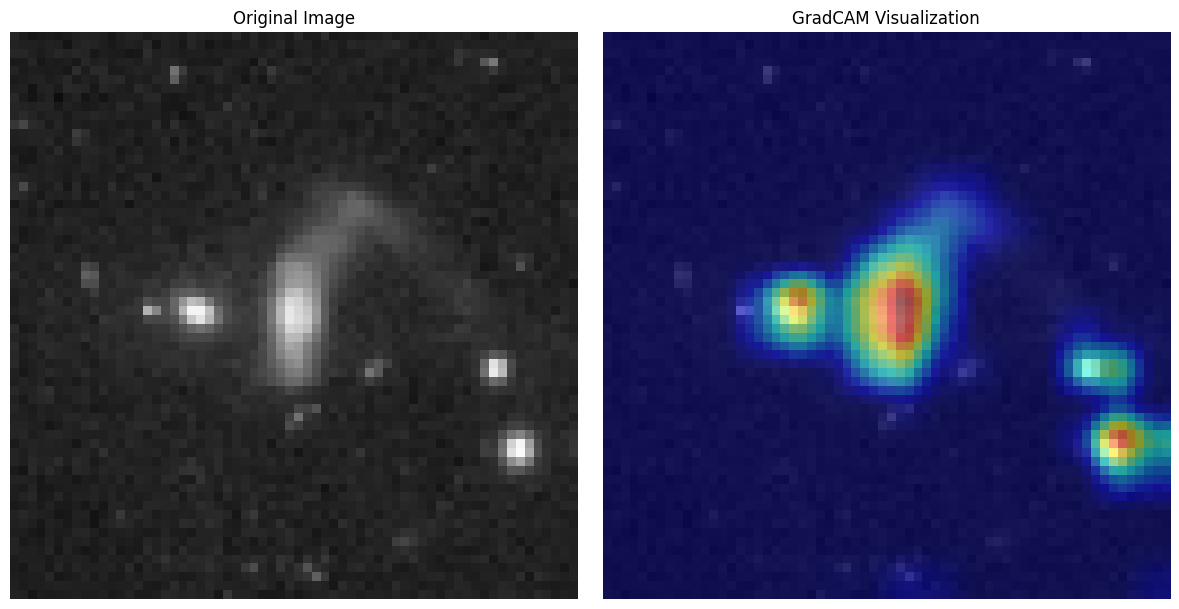

In [193]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# Initialize the model
num_classes = 10  # Adjust based on your number of classes
model = SimpleCNN(num_classes=num_classes)

# Load your image (grayscale)
img_path = '/home/vamsi/cv/project/grayclass/dg64/0/image_0.png'  # Replace with your image path
img = Image.open(img_path).convert('L')  # 'L' mode for grayscale

# Preprocessing: resize and convert to tensor
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize image to 64x64
    transforms.ToTensor(),  # Convert to tensor
])

input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

# Convert input tensor to numpy array for visualization
rgb_img = np.array(img.convert('RGB')) / 255.0  # Normalize to [0, 1] range

# Load your SimpleCNN model
model.eval()

# Define the target layer for CAM (the last convolutional layer)
target_layers = [model.conv_layers[-1]]  # Target the last convolutional layer

# Define the target for CAM (you can choose the correct class index)
targets = [ClassifierOutputTarget(0)]  # Use the class index for your target class

# Create the GradCAM object and compute the CAM
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]  # Use the first image in the batch
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Now `visualization` contains the image with the CAM overlay, you can display it using matplotlib
# Display input and output images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
ax[0].imshow(rgb_img)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Display CAM overlay image
ax[1].imshow(visualization)
ax[1].set_title("GradCAM Visualization")
ax[1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
